# Data Storytelling

A variable dictionary can be found at https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier

The output variable I am interested in is one's ability to handle an unexpected financial expense. Originally a 5-point ordinal variable, I encoded it as a Boolean variable 'target' that is True if the response was 4 or 5, indicating high confidence in one's ability to handle unexpected expenses. 

In [3]:
#Create dataframe df containing data and 'target' column 
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
#True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

Because there were so many features in this data set (217, to be exact), I decided to use a random forest to act as an initial screen for what variables I would be exploring. I then selected what variables would be interesting to look at regarding their relationship to dealing with unexpected payments and costs.

In [17]:
#Remove columns containing financial well being scores and other irrelevant columns
fwb_cols = [col for col in df if col.startswith('FWB')]
swb_cols = [col for col in df if col.startswith('SWB')]
fs_cols = [col for col in df if col.startswith('FS1')]
dfx = df.drop(fwb_cols + swb_cols + fs_cols + ['PUF_ID', 'finalwt', 'FSscore', 'target'], axis=1)

#Use a random forest to identify possible top features
X = dfx.values
y = df['FWB1_1'].values

rfc = RandomForestClassifier()
rfc.fit(X, y)
idx = np.argsort(rfc.feature_importances_)[::-1]
for c, value in enumerate(dfx.columns[idx][:15]):
    print(c+1, value)

1 SAVINGSRANGES
2 ACT1_2
3 GOALCONF
4 ABSORBSHOCK
5 ENDSMEET
6 SAVEHABIT
7 MANAGE1_3
8 CONNECT
9 SUBKNOWL1
10 PPINCIMP
11 LIFEEXPECT
12 PPREG9
13 MANAGE1_2
14 SCFHORIZON
15 CHANGEABLE


We can see from the output above that some of the variables heavily associated with our target variable are the ability to raise $2,000 in 30 days, the frequency of paying off one's monthly credit card balance, financial knowledge, and income.

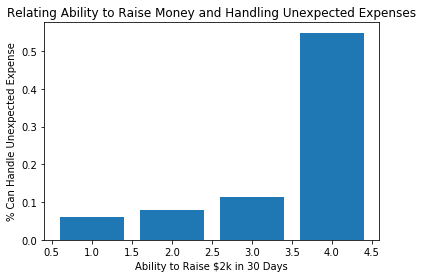

In [5]:
#Remove rows where response was 8 (corresponding to 'I don't know') or -1 (no response)
dfabsorb = df[(df['ABSORBSHOCK'] != 8) & (df['ABSORBSHOCK'] != -1)]

#Create table containing relevant values
absorb_tab = pd.crosstab(dfabsorb['ABSORBSHOCK'], dfabsorb['target'])

#Create x and y values to graph
x_vals = np.arange(4) + 1
absorb_vals = np.empty(4)
for i in range(4):
    #Calculate percentage of respondents who responded True for target variable, grouped by response
    absorb_vals[i] = absorb_tab.loc[i+1, True] / np.sum(absorb_tab.iloc[i, 0:2])

#Create bar graph 
plt.bar(x_vals, absorb_vals)
plt.title('Relating Ability to Raise Money and Handling Unexpected Expenses')
plt.xlabel('Ability to Raise $2k in 30 Days')
plt.ylabel('% Can Handle Unexpected Expense')
plt.show()

We can see that certainty in being able to raise $2,000 in 30 days causes a large spike of confidence in the ability to handle an unexpected expense, while certainly not being able to do so up to even probably being able to do so seem to inspire about equal levels of confidence.

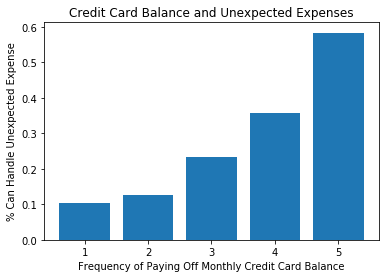

In [6]:
#Remove rows with no response
dfmanage = df[df['MANAGE1_3'] != -1]

#Create table with relevant values
manage_tab = pd.crosstab(dfmanage['MANAGE1_3'], dfmanage['target'])

#Create x and y values to graph
x_vals = np.arange(5) + 1
manage_vals = np.empty(5)
for i in range(5):
    #Calculate percentage of respondents who responded True for target variable, grouped by response
    manage_vals[i] = manage_tab.loc[i+1, True] / np.sum(manage_tab.iloc[i, 0:2])

#Create bar graph
plt.bar(x_vals, manage_vals)
plt.title('Credit Card Balance and Unexpected Expenses')
plt.xlabel('Frequency of Paying Off Monthly Credit Card Balance')
plt.ylabel('% Can Handle Unexpected Expense')
plt.xticks(x_vals)
plt.show()

We can see a more gradual effect in paying off one's credit card balance in full every month on one's confidence in their ability to handle unexpected financial expenses.

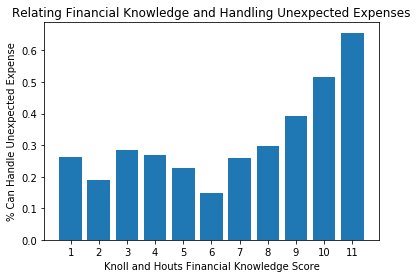

In [7]:
#Create table with relevant values
khscore_tab = pd.crosstab(df['KHscore'], df['target'])

#Create x and y values to graph
x_vals = np.arange(11) + 1
khscore_vals = np.empty(11)
for i in range(11):
    #Calculate percentage of respondents who responded True for target variable, grouped by response
    khscore_vals[i] = khscore_tab.iloc[i, 1] / np.sum(khscore_tab.iloc[i, 0:2])

#Create bar graph
plt.bar(x_vals, khscore_vals)
plt.title('Relating Financial Knowledge and Handling Unexpected Expenses')
plt.xlabel('Knoll and Houts Financial Knowledge Score')
plt.ylabel('% Can Handle Unexpected Expense')
plt.xticks(x_vals)
plt.show()

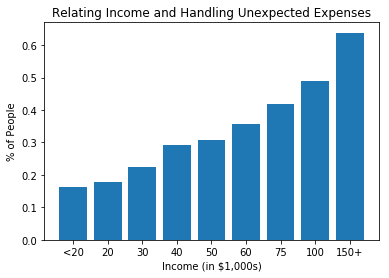

In [16]:
#Create table with relevant values
income_tab = pd.crosstab(df['PPINCIMP'], df['target'])

#Create x and y values to graph
x_vals = np.arange(9) + 1
x_labels = ['<20', '20', '30', '40', '50', '60', '75', '100', '150+']
income_vals = np.empty(9)
for i in range(9):
    #Calculate percentage of respondents who responded True for target variable, grouped by response
    income_vals[i] = income_tab.loc[i+1, True] / np.sum(income_tab.iloc[i, 0:2])

#Create bar graph
plt.bar(x_vals, income_vals)
plt.title('Relating Income and Handling Unexpected Expenses')
plt.xlabel('Income (in $1,000s)')
plt.ylabel('% of People')
plt.xticks(x_vals, x_labels)
plt.show()